In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

In [4]:
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class:
df = pd.read_csv("iris.data", names=["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
%matplotlib inline

In [9]:
plt.rcParams["font.size"] = 16

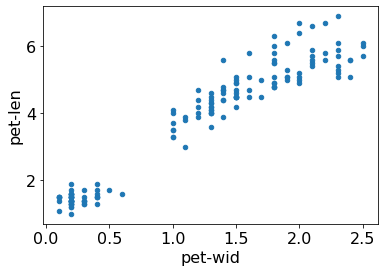

In [10]:
df.plot.scatter(x="pet-wid", y="pet-len")

In [12]:
set(df["class"])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

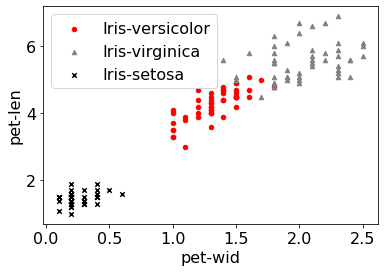

In [26]:
_, ax = plt.subplots()
markers = ["o", "^", "x"]
colors = ["r", "0.5", "k"]
for cls in set(df["class"]):
    sub_df = df[df["class"] == cls]
    sub_df.plot.scatter(x="pet-wid", y="pet-len", ax=ax,
                        marker=markers.pop(0), color=colors.pop(0),
                        label=cls)
ax.legend()

# Part 2: Line Plots

In [30]:
s = pd.Series([1, 2, 9, 3, 50, 4], index=[100, 101, 200, 102, 201, 202])
s

100     1
101     2
200     9
102     3
201    50
202     4
dtype: int64

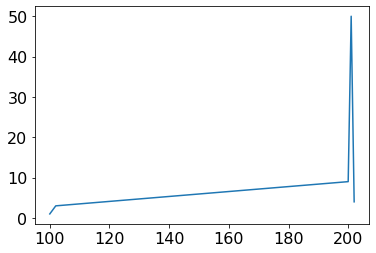

In [36]:
s.sort_index().plot.line()

In [39]:
temp = pd.DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
temp

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


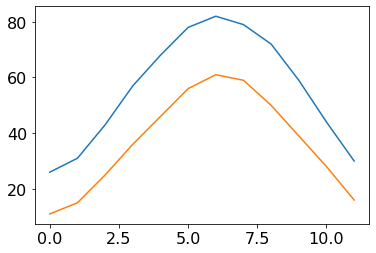

In [41]:
area = temp["high"].plot.line()
temp["low"].plot.line(ax=area)

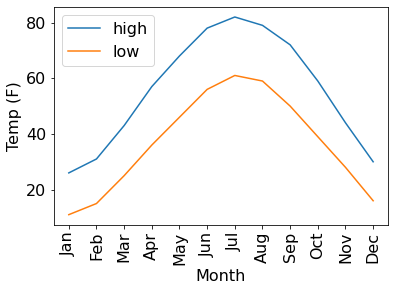

In [60]:
ax = temp.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (F)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
                    rotation=90)
ax.set_xticks(range(12))
None

In [66]:
celc = (temp - 32) / (212-32) * 100
celc.head()

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778


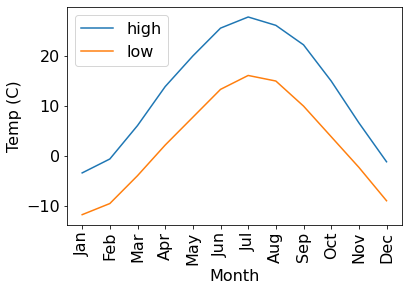

In [67]:
ax = celc.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (C)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
                    rotation=90)
ax.set_xticks(range(12))
None

# Part 3: Construction Style for New Houses

Goal:
 * x-axis is year
 * y-axis is number of new houses in Madison
 * each line represents a different style

Need a table:
 * index is year
 * column is style
 * value is number of houses
 
New pandas methods:
 * groupby and agg
 * pivot

In [114]:
df = pd.read_csv("property.csv")[["YearBuilt", "HomeStyle", "Address"]]
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,104,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YearBuilt,HomeStyle,Address
0,1969,Ranch,733 Dearholt Rd
1,1954,Ranch,5026 Milward Dr
2,1959,Ranch,5217 Fairway Dr
3,1961,Split-level,5305 Fairway Dr
4,1955,Ranch,5310 Loruth Ter


In [116]:
# recent houses
df = df[df["YearBuilt"] >= 2000]
df.head()

,YearBuilt,HomeStyle,Address
19,2002,Ranch,5602 Westbury Pl
419,2004,Garden,614 W Doty St Unit 103
420,2004,Garden,614 W Doty St Unit 104
421,2004,Garden,614 W Doty St Unit 107
422,2004,Garden,614 W Doty St Unit 108


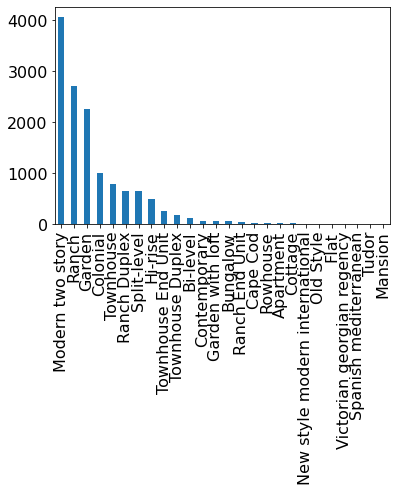

In [119]:
df["HomeStyle"].value_counts().plot.bar()

In [123]:
popular = list(df["HomeStyle"].value_counts().index[:8])
popular

['Modern two story',
 'Ranch',
 'Garden',
 'Colonial',
 'Townhouse',
 'Ranch Duplex',
 'Split-level',
 'Hi-rise']

In [126]:
df = df[df["HomeStyle"].isin(popular)]
df.head()

,YearBuilt,HomeStyle,Address
19,2002,Ranch,5602 Westbury Pl
419,2004,Garden,614 W Doty St Unit 103
420,2004,Garden,614 W Doty St Unit 104
421,2004,Garden,614 W Doty St Unit 107
422,2004,Garden,614 W Doty St Unit 108


In [ ]:
# SQL: GROUP BY on year,style; COUNT() rows in each group

In [131]:
counts = df.groupby(["YearBuilt", "HomeStyle"],
                    as_index=False).agg("count")
counts.head()

,YearBuilt,HomeStyle,Address
0,2000,Colonial,66
1,2000,Garden,93
2,2000,Modern two story,205
3,2000,Ranch,179
4,2000,Ranch Duplex,68


In [134]:
plot_df = counts.pivot(index="YearBuilt",
                       columns="HomeStyle",
                       values="Address").fillna(0)
plot_df.head()

HomeStyle,Colonial,Garden,Hi-rise,Modern two story,Ranch,Ranch Duplex,Split-level,Townhouse
YearBuilt,,,,,,,,
2000,66.0,93.0,0.0,205.0,179.0,68.0,128.0,62.0
2001,103.0,198.0,0.0,273.0,252.0,77.0,137.0,70.0
2002,95.0,256.0,68.0,286.0,310.0,70.0,133.0,53.0
2003,165.0,252.0,1.0,310.0,289.0,84.0,132.0,63.0
2004,158.0,338.0,30.0,278.0,187.0,96.0,59.0,95.0


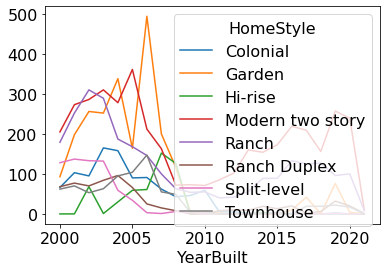

In [135]:
plot_df.plot.line()